# Different libraries to specifically work with images in Python

In [ ]:
# There are some good libraries which makes working with images easy in Python. I have mentioned few important ones below- 
1. OpenCV
2. PIL/Pillow
3. Scikit-image
4. Scipy
5. Numpy

In [1]:
#Importing libraries 
import cv2
from PIL import Image
import numpy as np
from skimage import io

In [2]:
#Lets learn how to use opencv functions for images
#lets read an image first
#img = io.imread('https://www.cascadeloans.com/wp-content/uploads/2015/07/modular-home.jpg')

img = cv2.imread('modular-home.jpg',1)

#Warning Even if the image path is wrong, it won’t throw any error, but print img will give you None


In [3]:
print(img)   #Its an array, the data structure of Opencv images

[[[ 88  89  79]
  [ 27  31  20]
  [  8  14   3]
  ...
  [ 39  58  39]
  [ 68 107  86]
  [ 75 131 110]]

 [[ 69  70  60]
  [ 40  44  33]
  [ 22  28  17]
  ...
  [ 79  97  80]
  [100 139 118]
  [ 90 147 126]]

 [[ 34  35  25]
  [ 34  38  27]
  [ 28  34  23]
  ...
  [100 124 106]
  [107 149 131]
  [ 73 136 116]]

 ...

 [[155 173 172]
  [152 170 169]
  [149 167 166]
  ...
  [ 79 182 167]
  [ 78 181 166]
  [ 77 180 165]]

 [[164 165 169]
  [165 166 170]
  [166 167 171]
  ...
  [ 84 185 170]
  [ 83 184 169]
  [ 82 183 168]]

 [[143 150 153]
  [144 151 154]
  [147 154 157]
  ...
  [ 80 181 166]
  [ 79 180 165]
  [ 78 179 164]]]


In [4]:
cv2.imshow('image',img)

In [3]:
from matplotlib import pyplot as plt

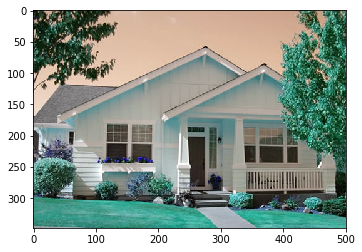

In [134]:
plt.imshow( img,cmap = 'flag')
plt.show()

#Warning Color image loaded by OpenCV is in BGR mode. But Matplotlib displays in RGB mode. So color 
#images will not be displayed correctly in Matplotlib if image is read with OpenCV. 

#Know more about cmap here - https://matplotlib.org/examples/color/colormaps_reference.html


In [4]:
#We see the OpenCV image is in BGR form while normal images follows RGB Form

#Whats the solution?
#Lets covert the color scheme of our image here

RGBimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

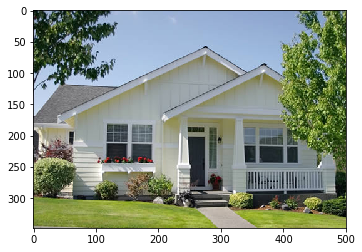

In [5]:
#Now if we print this image
plt.imshow( RGBimg,cmap = 'gray')
plt.show()

#Here we get our original image in RGB form

In [6]:
#To change our image to gray image, lets convert the color again
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

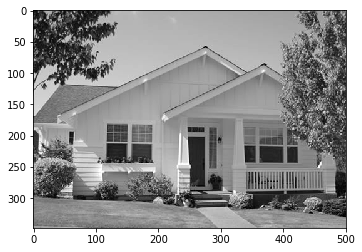

In [7]:
#Now if we print this image
plt.imshow( gray_img,cmap = 'gray')
plt.show()

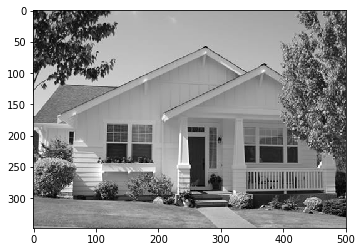

In [10]:
# if we convert grayscale back to RGB for plt.imshow()
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

In [11]:
#What is the average color of your image?
#As our image is in form of numpy array, below is the way we can get an avg color along the row

average_color_per_row = np.average(img, axis=0)

In [12]:
average_color_per_row  #It will show avg color per row for each channel

array([[101.72126437, 116.79597701, 107.97988506],
       [111.43103448, 127.08908046, 117.8591954 ],
       [108.62356322, 125.4137931 , 115.42528736],
       ...,
       [ 39.16954023,  85.24137931,  64.04310345],
       [ 38.87068966,  84.87931034,  63.79310345],
       [ 37.58908046,  83.74137931,  62.62356322]])

In [16]:
#If we want to find average across average per row
avg_color = np.average(average_color_per_row, axis = 0)
np.uint8(avg_color)  
#This is our avg color of image

array([122, 136, 124], dtype=uint8)

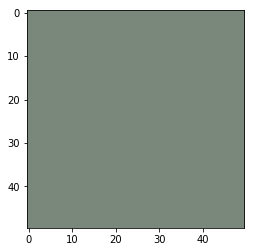

In [20]:
# create 50 x 50 pixel array with average color value
average_color_img = np.array([[avg_color]*50]*50, np.uint8)

plt.imshow(average_color_img)
#Now you can visually see the color of the avg_color of our image

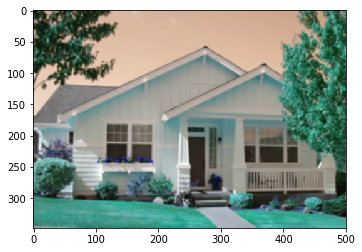

In [35]:
#Gaussian Blur
# preproccess with blurring, with 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(img_blur_small)

#Know more about blurring operation here - https://computergraphics.stackexchange.com/questions/39/how-is-gaussian-blur-implemented

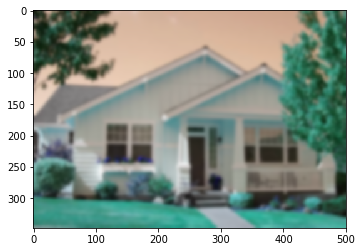

In [36]:
img_blur_large = cv2.GaussianBlur(img, (15,15), 0)
plt.imshow(img_blur_large)

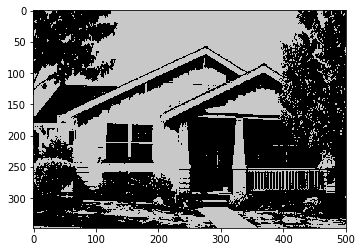

In [49]:
# threshold on regular image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold_img = cv2.threshold(gray_img, 150, 200, cv2.THRESH_BINARY)
#cv2.imwrite('output/oy-no-blur-thresh.jpg', threshold_img)
#plt.imshow(threshold_img[1])
plt.imshow(cv2.cvtColor(threshold_img[1], cv2.COLOR_GRAY2RGB))


#learn more about image threshold here - https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

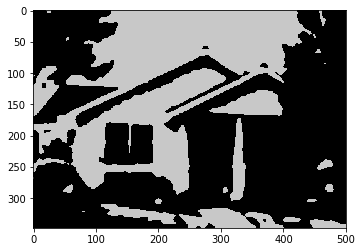

In [50]:
#Threshold on blurred image
gray_blur_img = cv2.cvtColor(img_blur_large, cv2.COLOR_BGR2GRAY)
threshold_img_blur = cv2.threshold(gray_blur_img, 150, 200, cv2.THRESH_BINARY)
#cv2.imwrite('output/oy-no-blur-thresh.jpg', threshold_img)
#plt.imshow(threshold_img[1])
plt.imshow(cv2.cvtColor(threshold_img_blur[1], cv2.COLOR_GRAY2RGB))


In [26]:
#write an image
cv2.imwrite('homeimage.png',img)

True

In [68]:
img.shape

(348, 500, 3)

In [69]:
img.dtype

dtype('uint8')

In [70]:
img.size

522000

In [71]:
type(img)

numpy.ndarray

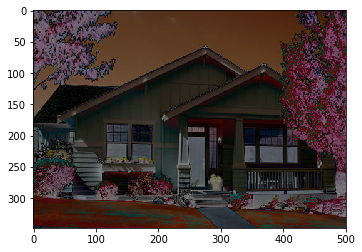

In [100]:
#Normalize the image
#np.mean(img)
#img = normalize(img)
plt.imshow(np.abs(img - np.mean(img))/255)

(array([ 24673.,  49884.,  50543.,  37527.,  50501.,  94007., 122873.,
         49337.,  35883.,   6772.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

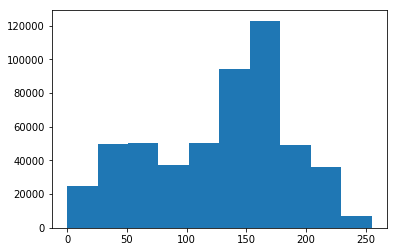

In [101]:
#Histogram of image

plt.hist(img.flatten())

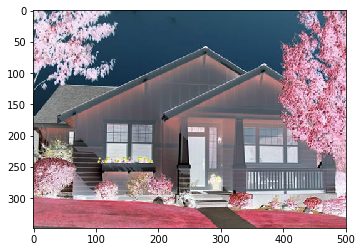

In [102]:
#Inverted image
plt.imshow(255- img)

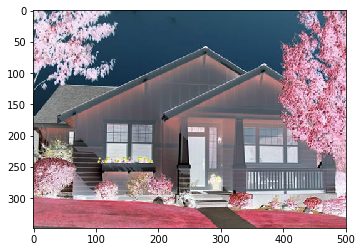

In [103]:
#also
plt.imshow(cv2.bitwise_not(img))

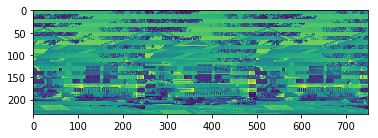

In [116]:
#Resizing the image
gray_img.shape
plt.imshow(np.reshape(gray_img, (232,750)))

#Learn more about reshape here - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html

In [112]:
gray_img.shape

(348, 500)

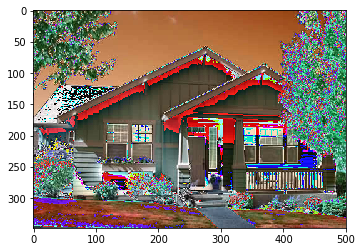

In [133]:
plt.imshow(img*2)

In [64]:
#Edge detection 
# preprocess by blurring and grayscale
img_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(img, (15,15), 0), cv2.COLOR_BGR2GRAY)

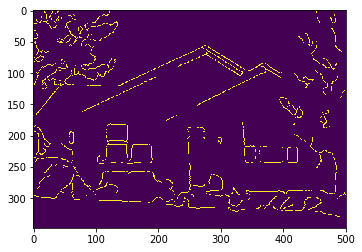

In [72]:
edges = cv2.Canny(img_preprocessed, threshold1=20, threshold2=110)
plt.imshow(edges)

#Read more about canny edge detection here - https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html

In [74]:
#Drawing countors 
img_binary = cv2.threshold(img_preprocessed, 130, 255, cv2.THRESH_BINARY)
img_binary = img_binary[1]

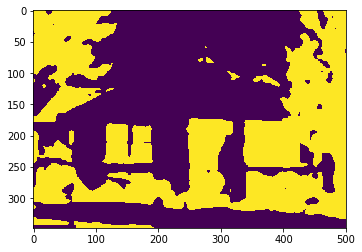

In [75]:
# invert image to get a different view
img_binary = cv2.bitwise_not(img_binary)
plt.imshow(img_binary)


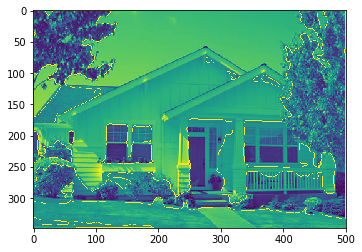

In [89]:
# find contours
img_contours= cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
img_and_contours = np.copy(img)

# find contours of large enough area
min_area = 50
large_contours = [cnt for cnt in img_contours[1] if cv2.contourArea(cnt) > min_area]

gray = cv2.cvtColor(img_and_contours, cv2.COLOR_BGR2GRAY)
# draw contours
cv2.drawContours(gray, large_contours, -1, (255,0,0))

plt.imshow(gray)
#cv2.imwrite('output/coins-contour.jpg', coins_and_contours)

# print number of contours
#print('number of coins: %d' % len(large_contours))

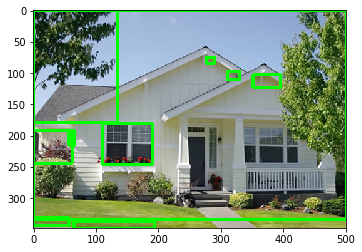

In [90]:
#GET BOUNDING BOXES 

# create copy of image to draw bounding boxes
bounding_img = np.copy(img)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))
#cv2.imwrite('output/coins-bounding.jpg', bounding_img)